=== Confusion Matrix ===
[[2 0 2 0]
 [0 1 0 0]
 [4 0 5 1]
 [2 0 1 2]]

=== Classification Report ===
              precision    recall  f1-score   support

     fantasy       0.25      0.50      0.33         4
     fiction       1.00      1.00      1.00         1
     mystery       0.62      0.50      0.56        10
 non-fiction       0.67      0.40      0.50         5

    accuracy                           0.50        20
   macro avg       0.64      0.60      0.60        20
weighted avg       0.58      0.50      0.52        20



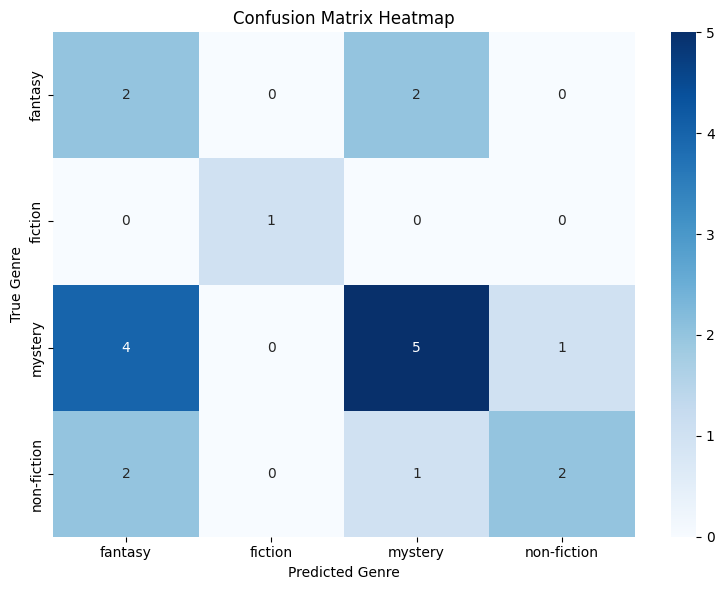

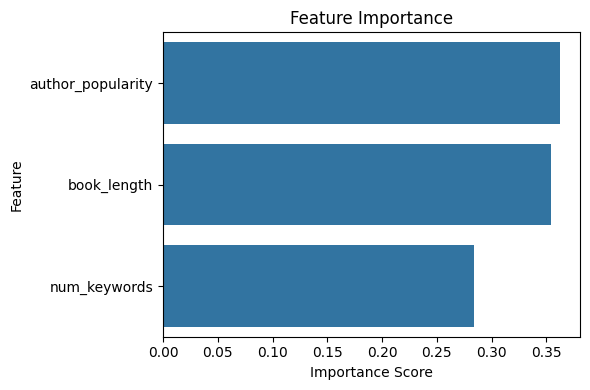

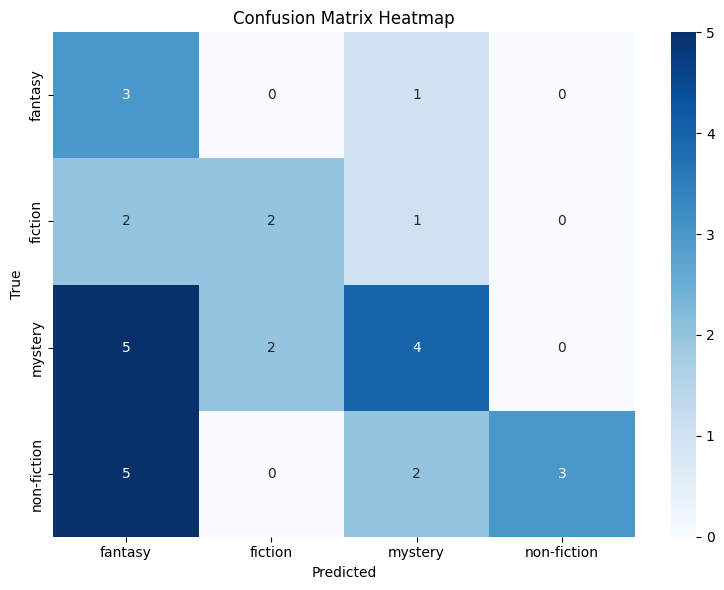

              precision    recall  f1-score  support
fantasy        0.200000  0.750000  0.315789      4.0
fiction        0.500000  0.400000  0.444444      5.0
mystery        0.500000  0.363636  0.421053     11.0
non-fiction    1.000000  0.300000  0.461538     10.0
accuracy       0.400000  0.400000  0.400000      0.4
macro avg      0.550000  0.453409  0.410706     30.0
weighted avg   0.626667  0.400000  0.424411     30.0


In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report

# Load dataset
df = pd.read_csv("/content/book_genres.csv")

# Separate features and target
X = df.drop(columns='genre')
y = df['genre']

# Encode target labels
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Load the dataset
df = pd.read_csv("/content/book_genres.csv")

# Define features and target
X = df[['author_popularity', 'book_length', 'num_keywords']]
y = df['genre']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Train classifier
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)

# Predictions
y_pred = clf.predict(X_test)

# Print confusion matrix
print("=== Confusion Matrix ===")
conf_matrix = confusion_matrix(y_test, y_pred)
print(conf_matrix)

# Print classification report
print("\n=== Classification Report ===")
print(classification_report(y_test, y_pred))

# Plot confusion matrix heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues",
            xticklabels=clf.classes_, yticklabels=clf.classes_)
plt.title("Confusion Matrix Heatmap")
plt.xlabel("Predicted Genre")
plt.ylabel("True Genre")
plt.tight_layout()
plt.show()

# Plot feature importances
importances = clf.feature_importances_
features = X.columns

plt.figure(figsize=(6, 4))
sns.barplot(x=importances, y=features)
plt.title("Feature Importance")
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.3, random_state=42)

# Train Random Forest Classifier
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)

# Predict on test set
y_pred = clf.predict(X_test)

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)
labels = label_encoder.classes_

# Plot heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=labels, yticklabels=labels)
plt.title("Confusion Matrix Heatmap")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.tight_layout()
plt.show()

# Classification report
report = classification_report(y_test, y_pred, target_names=labels, output_dict=True)
report_df = pd.DataFrame(report).transpose()
print(report_df[['precision', 'recall', 'f1-score', 'support']])
